# Lab 4: Data Visualization and EDA

Objectives:
- To gain practice in creating various data visualizations
- To encourage students to perform EDA on the required dataset

***

1. Load all Superstore datasets.

*Note: The same dataset used in Lab 3*

In [119]:
# !unzip /content/Superstore.zip

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
# Write your code here
superstore_order = pd.read_csv("/content/Superstore/superstore_order.csv")
superstore_people = pd.read_csv("/content/Superstore/superstore_people.csv")
superstore_return = pd.read_csv("/content/Superstore/superstore_return.csv")

2. Determine shape of each dataset (print out the results as well).

In [122]:
# Write your code here
print(superstore_order.shape)
print(superstore_people.shape)
print(superstore_return.shape)

(8880, 21)
(4, 2)
(296, 2)


3. Show information of the dataset.


In [123]:
print(superstore_order.info())
print(superstore_people.info())
print(superstore_return.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8880 non-null   int64  
 1   Order ID       8880 non-null   object 
 2   Order Date     8880 non-null   object 
 3   Ship Date      8880 non-null   object 
 4   Ship Mode      8880 non-null   object 
 5   Customer ID    8880 non-null   object 
 6   Customer Name  8880 non-null   object 
 7   Segment        8880 non-null   object 
 8   Country        8880 non-null   object 
 9   City           8880 non-null   object 
 10  State          8880 non-null   object 
 11  Postal Code    8880 non-null   int64  
 12  Region         8880 non-null   object 
 13  Product ID     8880 non-null   object 
 14  Category       8880 non-null   object 
 15  Sub-Category   8880 non-null   object 
 16  Product Name   8880 non-null   object 
 17  Sales          8880 non-null   float64
 18  Quantity

In [124]:
# Write your code here (3.1)
print(superstore_order.isnull().sum())
print(superstore_people.isnull().sum())
print(superstore_return.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Person    0
Region    0
dtype: int64
Returned    0
Order ID    0
dtype: int64


4. Are there any missing values? If so, in which column?

Ans: There is no missing values in every tables because I use a isnull() method to find any null value but it say 0 for all.

5.
- 5.1 List unique segments
- 5.2 List unique segments and their corresponding count
- 5.3 Create a pie chart to demonstrate unique segments and their count
- 5.4 Briefly describe what could be interpreted from this pie chart

*Note: please create additional cells to answer 5.2 - 5.3*

In [125]:
# Write your code here (5.1)
superstore_order["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [126]:
# Write your code here (5.2)
consumer = 0
corporate = 0
home_office = 0
for i in superstore_order["Segment"]:
  if i in superstore_order["Segment"].unique():
    if i == "Consumer":
      consumer += 1
    elif i == "Corporate":
      corporate += 1
    else:
      home_office += 1
print(f"Consumer: {consumer}, Corporate: {corporate}, Home Office: {home_office}")

Consumer: 4613, Corporate: 2673, Home Office: 1594


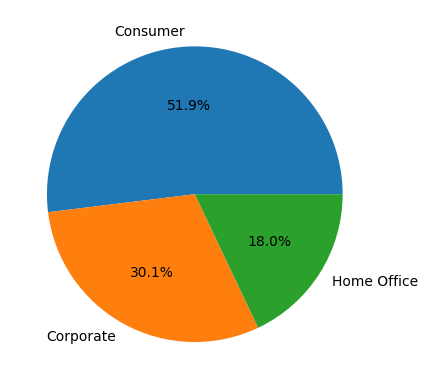

In [127]:
# Write your code here (5.3)
labels = 'Consumer', 'Corporate', 'Home Office'
sizes = [consumer, corporate, home_office]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

Answer for the question 5.4

Ans: To see the proportion of customer Segment in superstore_order.

6.
- 6.1 List unique states
- 6.2 List top-10 unique states and their corresponding count
- 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
- 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
- 6.5 Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

*Note: please create additional cells to answer 6.2 - 6.4*

In [128]:
# Write your code here (6.1)
superstore_order['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [129]:
# Write your code here (6.2)
df = superstore_order['State'].value_counts()[0:10]
df

California        1754
New York          1001
Texas              860
Pennsylvania       531
Washington         452
Illinois           427
Ohio               396
Florida            339
Michigan           230
North Carolina     229
Name: State, dtype: int64

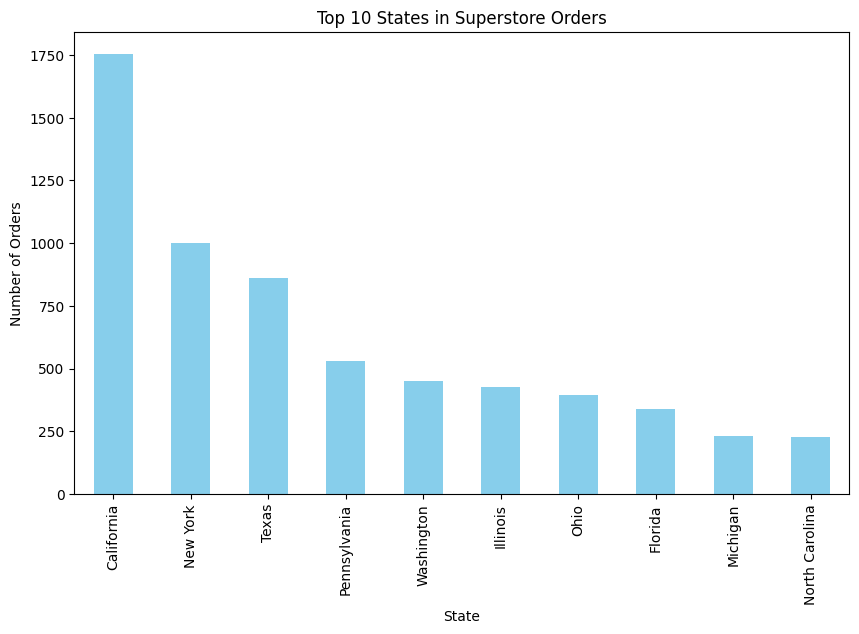

In [130]:
# Write your code here (6.3)
plt.figure(figsize=(10, 6))
df.plot(kind='bar', color='skyblue')
plt.title('Top 10 States in Superstore Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.show()

In [131]:
# Write your code here (6.4)
df1 = superstore_order
top_states = df1['State'].value_counts().head(10)

total_sales = []
state_names = top_states.index

for state in state_names:
    sales_sum = df1[df1['State'] == state]['Sales'].sum()
    total_sales.append(sales_sum)

result_df = pd.DataFrame({
    'State': state_names,
    'Count': top_states.values,
    'Total Sales': total_sales
})

print(result_df)


            State  Count  Total Sales
0      California   1754  399195.4555
1        New York   1001  274866.8190
2           Texas    860  147855.0282
3    Pennsylvania    531  103852.5210
4      Washington    452  124497.7780
5        Illinois    427   71456.1780
6            Ohio    396   67924.2140
7         Florida    339   84083.0880
8        Michigan    230   62147.6960
9  North Carolina    229   49962.1580


Answer for the question 6.5

Ans: To see the top 10 state that our product can sell the most including total sales and count.

7.
- 7.1 List unique categories
- 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
- 7.3 Compute the ratio of these categories in percentage and print the results

*Note: please create additional cells to answer 7.2 - 7.3*

In [132]:
# Write your code here (7.1)
df2 = superstore_order["Category"].unique()
df2

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

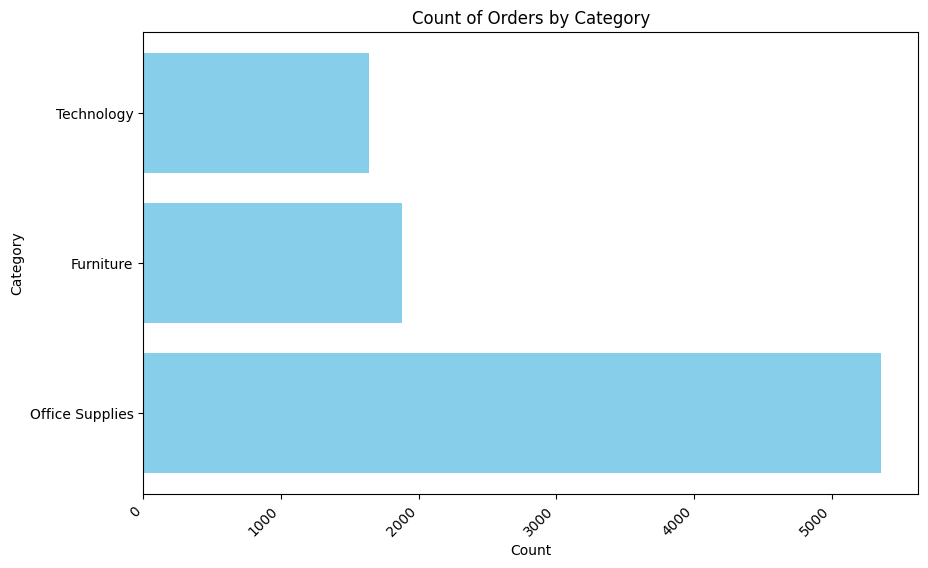

In [133]:
# Write your code here (7.2)
list2 = superstore_order["Category"].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(y=list2.index, width=list2.values, color='skyblue')
plt.ylabel('Category')
plt.xlabel('Count')
plt.title('Count of Orders by Category')
plt.xticks(rotation=45, ha='right')
plt.show()

In [134]:
# list2.values
print(f"Technology: {list2.values[2]/list2.values.sum()*100}%, Furniture: {list2.values[1]/list2.values.sum()*100}%, Office Supplies: {list2.values[0]/list2.values.sum()*100}%")


Technology: 18.46846846846847%, Furniture: 21.17117117117117%, Office Supplies: 60.36036036036037%


8. Update the type of all columns that contain dates to *datetime* and show information after an update.

In [135]:
# write your code here
superstore_order = pd.read_csv("/content/Superstore/superstore_order.csv")
superstore_order["Order Date"] = pd.to_datetime(superstore_order["Order Date"], format='%d/%m/%Y', errors='coerce')
superstore_order["Ship Date"] = pd.to_datetime(superstore_order["Ship Date"], format='%d/%m/%Y', errors='coerce')
superstore_order[["Order Date", "Ship Date"]]

,Order Date,Ship Date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,2016-06-16
3,2015-10-11,2015-10-18
4,2015-10-11,2015-10-18
...,...,...
8875,2016-08-13,2016-08-19
8876,2016-08-13,2016-08-19
8877,2017-09-17,2017-09-23
8878,2017-09-17,2017-09-23


9. Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

*Hint: The duration starts as soon as the item has been ordered and ends once the order has successfully shipped.*

In [136]:
superstore_order['Order Date'] = pd.to_datetime(superstore_order['Order Date'])
superstore_order['Ship Date'] = pd.to_datetime(superstore_order['Ship Date'])


superstore_order["Processing time day"] = (superstore_order['Ship Date'] - superstore_order['Order Date']).dt.days

result_df = superstore_order[['Order Date', 'Ship Date', 'Processing time day']]
print(result_df)

     Order Date  Ship Date  Processing time day
0    2016-11-08 2016-11-11                    3
1    2016-11-08 2016-11-11                    3
2    2016-06-12 2016-06-16                    4
3    2015-10-11 2015-10-18                    7
4    2015-10-11 2015-10-18                    7
...         ...        ...                  ...
8875 2016-08-13 2016-08-19                    6
8876 2016-08-13 2016-08-19                    6
8877 2017-09-17 2017-09-23                    6
8878 2017-09-17 2017-09-23                    6
8879 2015-03-23 2015-03-25                    2

[8880 rows x 3 columns]


10. Based on the result in 9.
- 10.1 How many orders are there that take more than 5 days to process?
- 10.2 Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
- 10.3 Plot the histogram based on the column Quantity

*Note: please create additional cells to answer 10.2 - 10.3*

In [137]:
# Write your code here (10.1)
print(f"Number of orders that take more than 5 days: {result_df[result_df['Processing time day'] > 5]['Order Date'].count()} orders")

Number of orders that take more than 5 days: 1656 orders


In [138]:
# Write your code here (10.2)
superstore_order[["Order ID", "Order Date", "Ship Date", "Processing time day", "Quantity"]].head()

,Order ID,Order Date,Ship Date,Processing time day,Quantity
0,CA-2016-152156,2016-11-08,2016-11-11,3,2
1,CA-2016-152156,2016-11-08,2016-11-11,3,3
2,CA-2016-138688,2016-06-12,2016-06-16,4,2
3,US-2015-108966,2015-10-11,2015-10-18,7,5
4,US-2015-108966,2015-10-11,2015-10-18,7,2


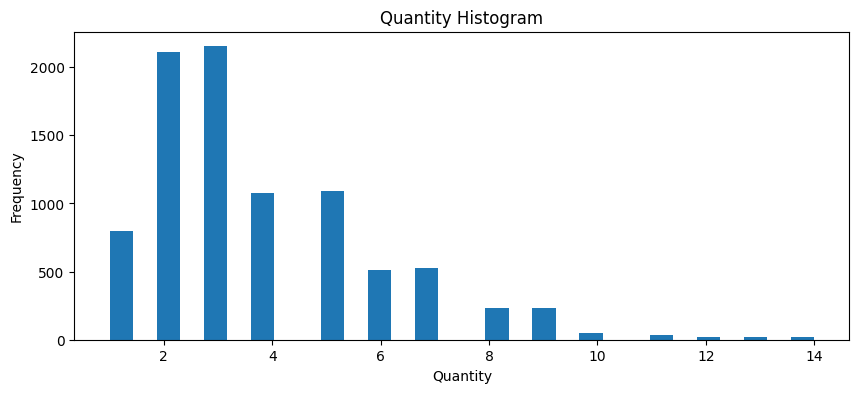

In [139]:
# Write your code here (10.3)
plt.figure(figsize=(10,4))
plt.hist(x=superstore_order["Quantity"], bins=30)
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Quantity Histogram")
plt.show()

[BONUS 20 pts] Determine the percentage of customers who:
- B1)returned the product once
- B2) returned the product at least once
- B3) never returned the product
- Finally, Plot a comparison of B2 and B3

*Note: please create additional cells to answer the above points*

In [147]:
#B1
df1 = superstore_order
df2 = superstore_return
df1.drop_duplicates(subset='Order ID', keep='first', inplace=True)
mergeDf = pd.merge(df1, df2, on='Order ID', how='left')

mergeDf['Returned'] = mergeDf['Returned'].replace({'yes': 1, 'Yes':1})
mergeDf['Returned'] = pd.to_numeric(mergeDf['Returned'])

reCount = mergeDf.groupby('Customer ID')['Returned'].sum()
reCount

Customer ID
AA-10315    0.0
AA-10375    0.0
AA-10480    0.0
AA-10645    1.0
AB-10015    0.0
           ... 
XP-21865    2.0
YC-21895    1.0
YS-21880    0.0
ZC-21910    1.0
ZD-21925    1.0
Name: Returned, Length: 789, dtype: float64

In [153]:
customer_return_once = (reCount==1).sum()
print(customer_return_once)

186


In [154]:
#B2
customer_atleast_once = (reCount >= 1).sum()
print(customer_atleast_once)

222


In [155]:
#B3
customer_never_returned = (reCount == 0).sum()
print(customer_never_returned)

567


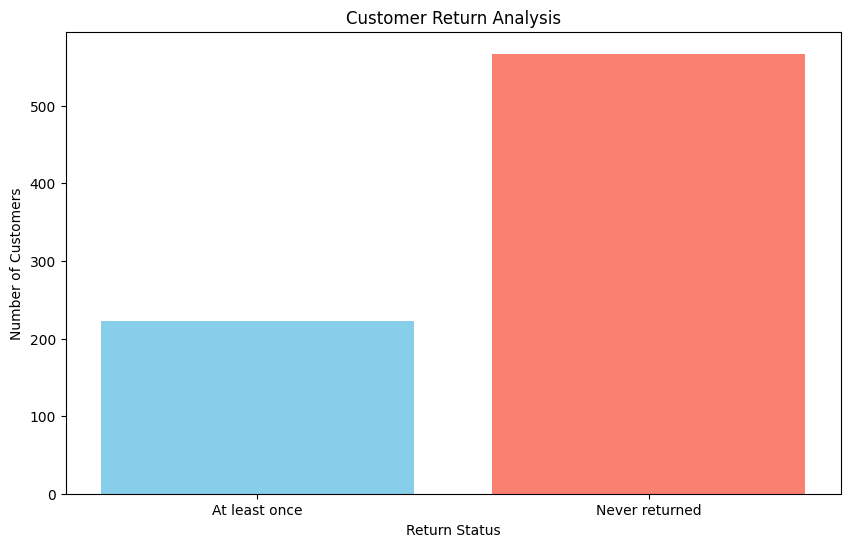

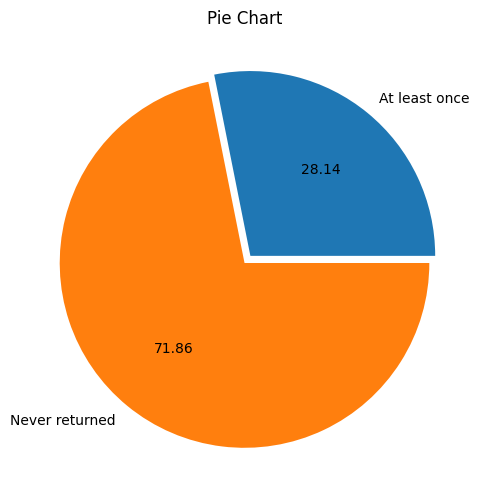

In [162]:
plt.figure(figsize=(10, 6))
plt.bar(['At least once', 'Never returned'], [(customer_atleast_once), (customer_never_returned)], color=['skyblue', 'salmon'])
plt.title('Customer Return Analysis')
plt.xlabel('Return Status')
plt.ylabel('Number of Customers')
plt.show()
plt.figure(figsize=(10,6))
plt.title("Pie Chart")
plt.pie(x=[customer_atleast_once, customer_never_returned], labels=['At least once', 'Never returned'], autopct='%.2f', explode=[0.05, 0])
plt.show()